In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import data as dt ## this user define module now inbuilt
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17436\2574849733.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r"C:\Users\lenovo\Downloads\archive\Amazon Sale Report.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
l = [i for i in df.columns if df[i].isna().sum()]
d = {}
for i in l:
        dh = round(df[i].isna().sum()/len(df)*100,2)
        d[i]= dh
print(d)
l1 = []
for k,v in d.items():
    if d[k] < 1:
        l1.append(k)

    

{'Courier Status': 5.33, 'currency': 6.04, 'Amount': 6.04, 'ship-city': 0.03, 'ship-state': 0.03, 'ship-postal-code': 0.03, 'ship-country': 0.03, 'promotion-ids': 38.11, 'fulfilled-by': 69.55, 'Unnamed: 22': 38.03}


In [6]:
l1


['ship-city', 'ship-state', 'ship-postal-code', 'ship-country']

In [7]:
df.dropna(subset = l1,axis = 0,inplace = True)

In [8]:
df.isna().sum()/len(df)*100

index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0.000000
Fulfilment             0.000000
Sales Channel          0.000000
ship-service-level     0.000000
Style                  0.000000
SKU                    0.000000
Category               0.000000
Size                   0.000000
ASIN                   0.000000
Courier Status         5.327201
Qty                    0.000000
currency               6.043803
Amount                 6.043803
ship-city              0.000000
ship-state             0.000000
ship-postal-code       0.000000
ship-country           0.000000
promotion-ids         38.114036
B2B                    0.000000
fulfilled-by          69.549100
Unnamed: 22           38.030277
dtype: float64

In [9]:
round(df.isna().sum()/len(df)*100,5)

index                  0.00000
Order ID               0.00000
Date                   0.00000
Status                 0.00000
Fulfilment             0.00000
Sales Channel          0.00000
ship-service-level     0.00000
Style                  0.00000
SKU                    0.00000
Category               0.00000
Size                   0.00000
ASIN                   0.00000
Courier Status         5.32720
Qty                    0.00000
currency               6.04380
Amount                 6.04380
ship-city              0.00000
ship-state             0.00000
ship-postal-code       0.00000
ship-country           0.00000
promotion-ids         38.11404
B2B                    0.00000
fulfilled-by          69.54910
Unnamed: 22           38.03028
dtype: float64

In [10]:
df.drop(columns = ['Unnamed: 22','index','Order ID','ASIN','currency','ship-postal-code'],axis = 1,inplace = True)

In [11]:
round(df.isna().sum()/len(df)*100,5)

Date                   0.00000
Status                 0.00000
Fulfilment             0.00000
Sales Channel          0.00000
ship-service-level     0.00000
Style                  0.00000
SKU                    0.00000
Category               0.00000
Size                   0.00000
Courier Status         5.32720
Qty                    0.00000
Amount                 6.04380
ship-city              0.00000
ship-state             0.00000
ship-country           0.00000
promotion-ids         38.11404
B2B                    0.00000
fulfilled-by          69.54910
dtype: float64

In [12]:
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,NaN,0,647.62,MUMBAI,MAHARASHTRA,IN,NaN,False,Easy Ship
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.00,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,IN,NaN,False,Easy Ship
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,Shipped,1,574.00,CHENNAI,TAMIL NADU,IN,NaN,False,NaN


In [13]:
df['fulfilled-by'].fillna('m',axis = 0,inplace = True)

In [14]:
df[['fulfilled-by']].head()

,fulfilled-by
0,Easy Ship
1,Easy Ship
2,m
3,Easy Ship
4,m


In [15]:
df['promotion-ids'].fillna('m',axis = 0,inplace = True)

In [16]:
df.isna().sum()

Date                     0
Status                   0
Fulfilment               0
Sales Channel            0
ship-service-level       0
Style                    0
SKU                      0
Category                 0
Size                     0
Courier Status        6869
Qty                      0
Amount                7793
ship-city                0
ship-state               0
ship-country             0
promotion-ids            0
B2B                      0
fulfilled-by             0
dtype: int64

In [17]:
df[(df['Courier Status'].isna()) & (df['Amount'].isna()) ].shape[0]

1736

In [18]:
df.dropna(axis = 0,inplace = True)

In [19]:
df.isna().sum()

Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
Courier Status        0
Qty                   0
Amount                0
ship-city             0
ship-state            0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 116016 entries, 1 to 128974
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                116016 non-null  object 
 1   Status              116016 non-null  object 
 2   Fulfilment          116016 non-null  object 
 3   Sales Channel       116016 non-null  object 
 4   ship-service-level  116016 non-null  object 
 5   Style               116016 non-null  object 
 6   SKU                 116016 non-null  object 
 7   Category            116016 non-null  object 
 8   Size                116016 non-null  object 
 9   Courier Status      116016 non-null  object 
 10  Qty                 116016 non-null  int64  
 11  Amount              116016 non-null  float64
 12  ship-city           116016 non-null  object 
 13  ship-state          116016 non-null  object 
 14  ship-country        116016 non-null  object 
 15  promotion-ids       116016 non-null  ob

## column description 
-  Numeric
  - qty , amount 
- categorical
  -  size , courier status , b2b , fulfilled by , pormotion id ,Fulfilment	, Sales Channel , ship-service-level , Category,
-  Special columns 
  - ship-country ,[This columns is represent country. this is pure indian sales]
- mixed columns
  -  ship-state , ship-city , SKU ,Style

In [21]:
df.head(2)

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,ship-country,promotion-ids,B2B,fulfilled-by
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,m


## qauatity 
conclusion
- There are so many outlier in the data
- its highly positive skewed and high variance


Discribe Five number summary in Qty columns: count    116016.000000
mean          1.003775
std           0.072651
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           8.000000
Name: Qty, dtype: float64
data Skwness: 28.43670992384742
variance in this data: 0.005278165758707782
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


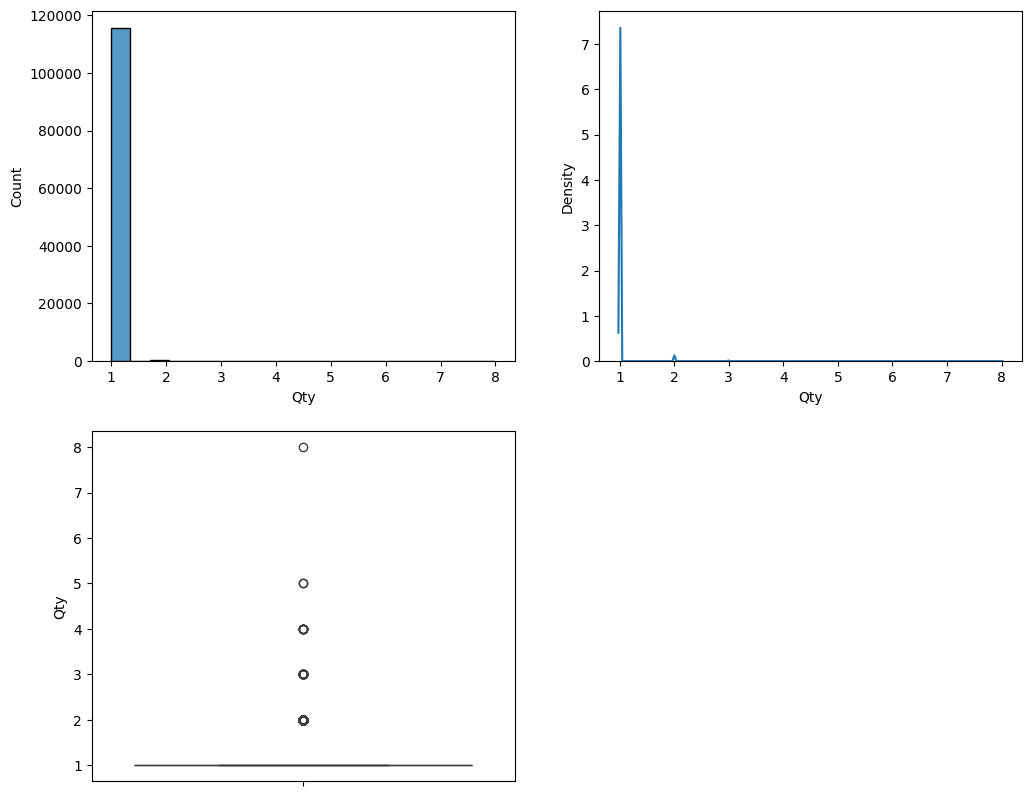

In [22]:
dt.single(df,'Qty')

In [23]:
dt.find_outlier(df,'Qty')

Total Iqr 0.0
Lower Boundry: 1.0
upper boundry: 1.0
0.3266790787477589%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [24]:
df = dt.remove_outlier(df,'Qty')

## After remove outlier in the data
conclusion
- there are no outlier in the data
-  people are purpase only single quantity product

Discribe Five number summary in Qty columns: count    115637.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: Qty, dtype: float64
data Skwness: 0.0
variance in this data: 0.0
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


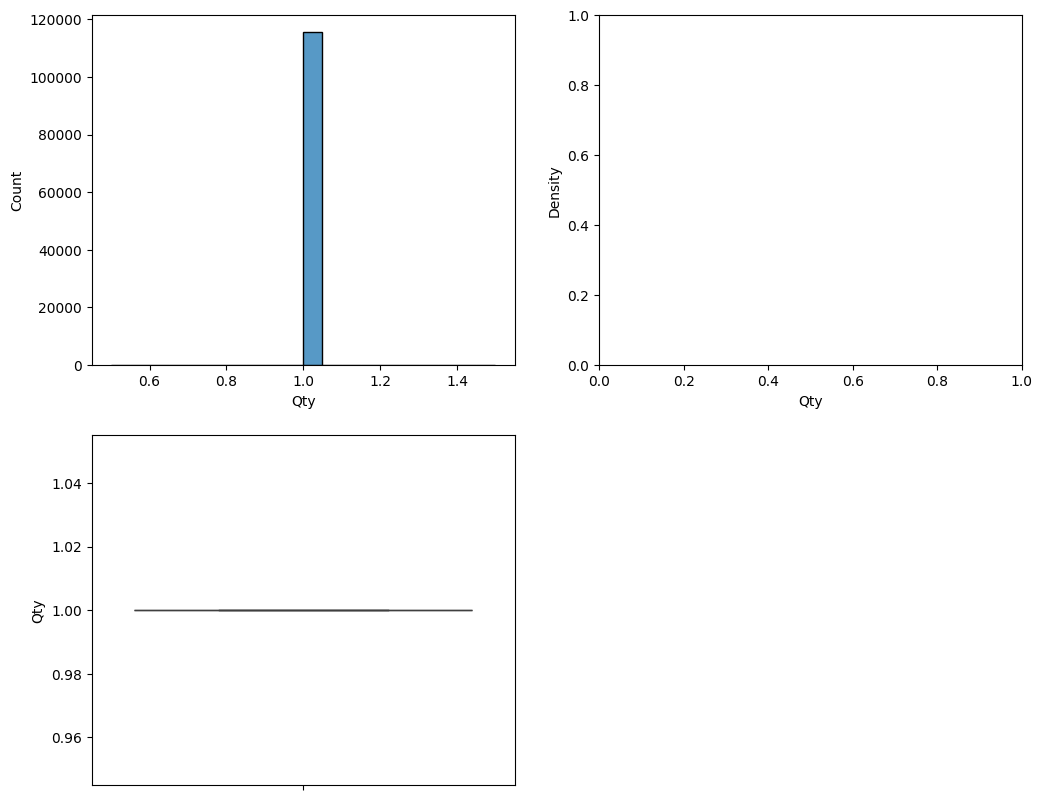

In [25]:
dt.single(df,'Qty')

## Amount
conclusion
- there are so many outlier  in the data
- data is skwed (positive) right side
- data is highly variance

Discribe Five number summary in Amount columns: count    115637.000000
mean        647.676955
std         278.675785
min           0.000000
25%         449.000000
50%         603.000000
75%         788.000000
max        2598.000000
Name: Amount, dtype: float64
data Skwness: 0.7079192184225108
variance in this data: 77660.19298761922
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


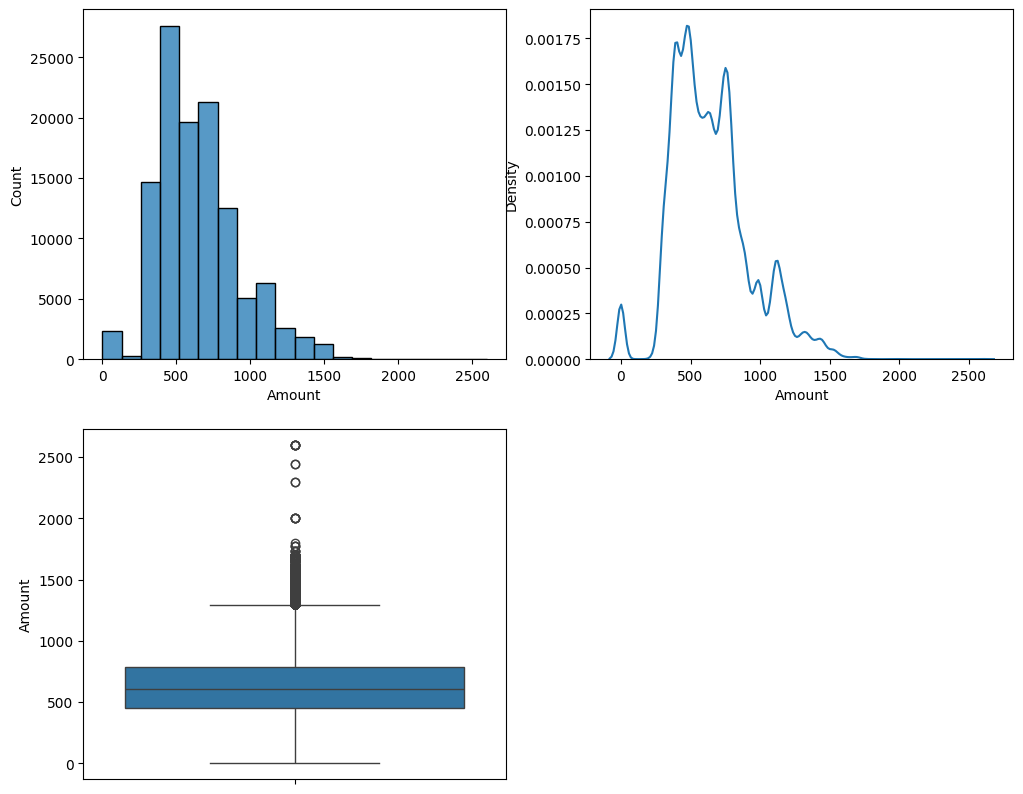

In [26]:
dt.single(df,'Amount')

In [27]:
df[df['Amount'] == 0].shape[0]

2343

In [28]:
dt.find_outlier(df,'Amount')

Total Iqr 339.0
Lower Boundry: -59.5
upper boundry: 1296.5
2.94282971713206%tile outlier in this data(positive)
0.0%tile outlier in this data(negetive)


In [29]:
df = dt.remove_outlier(df,'Amount')

## After remove the outlier in the data
conclusion
- There few outler  in the data.but its is valid
- data is almost normall distributed
- 50% data is above ₹400 and below ₹800  

Discribe Five number summary in Amount columns: count    112234.000000
mean        624.337768
std         247.193874
min           0.000000
25%         442.000000
50%         597.000000
75%         771.000000
max        1294.000000
Name: Amount, dtype: float64
data Skwness: 0.3424903626181943
variance in this data: 61104.811424189225
Axes(0.125,0.53;0.352273x0.35)
Axes(0.547727,0.53;0.352273x0.35)
Axes(0.125,0.11;0.352273x0.35)


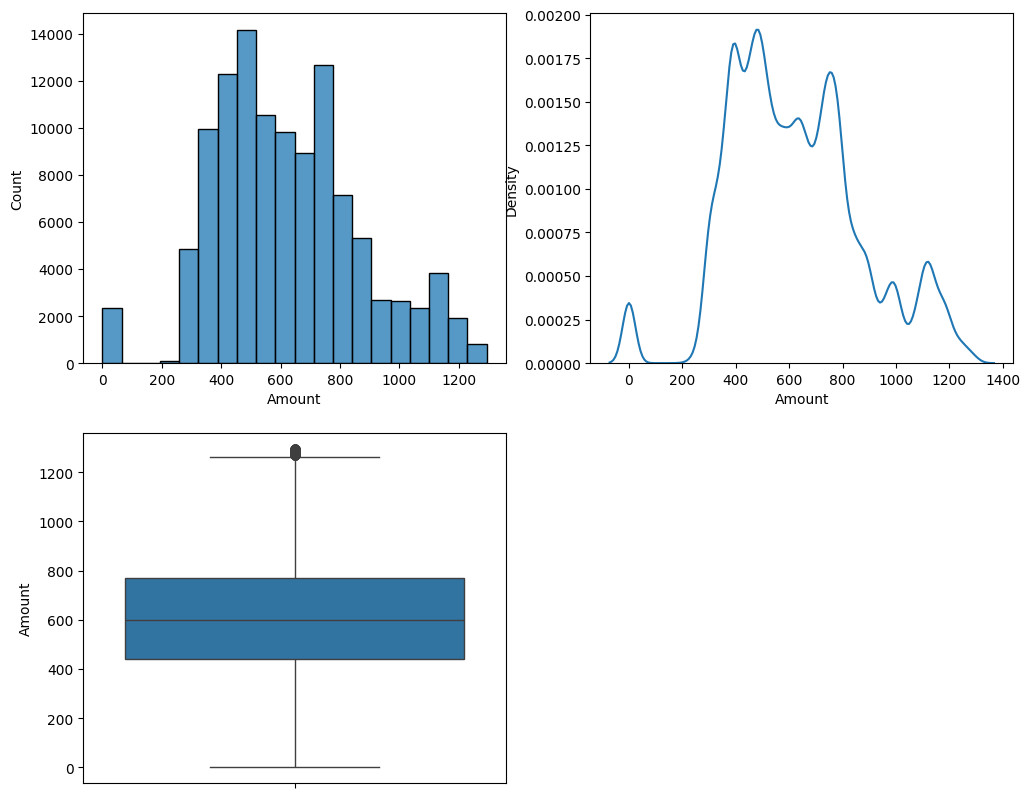

In [30]:
dt.single(df,'Amount')

In [31]:
df.describe(include=['object'])

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,Courier Status,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by
count,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234,112234
unique,91,12,2,1,2,1362,7039,9,11,2,8350,66,1,5690,2
top,05-02-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,kurta,M,Shipped,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,m
freq,1849,75079,80899,112234,79984,3664,659,44569,19637,105914,10078,19698,112234,44060,80899


# sales chcnnel 
conclusion
- there  are 100%tile sales is amazon.in channel


Sales Channel 
Amazon.in    112234
Name: count, dtype: int64


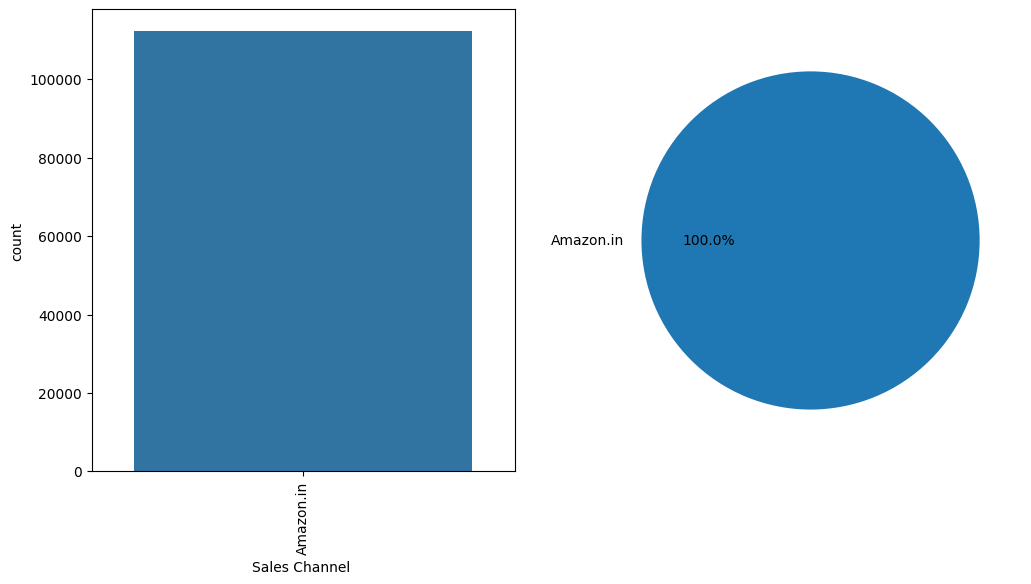

In [32]:
dt.cate(df,'Sales Channel ')

## Fulfilment
conclusion
- mostly amamon fulfilment customer order self around(72%) order fulfill self handle from amazon
- Around 30 % orders are fulfill by the Merchants of amazon

Fulfilment
Amazon      80899
Merchant    31335
Name: count, dtype: int64


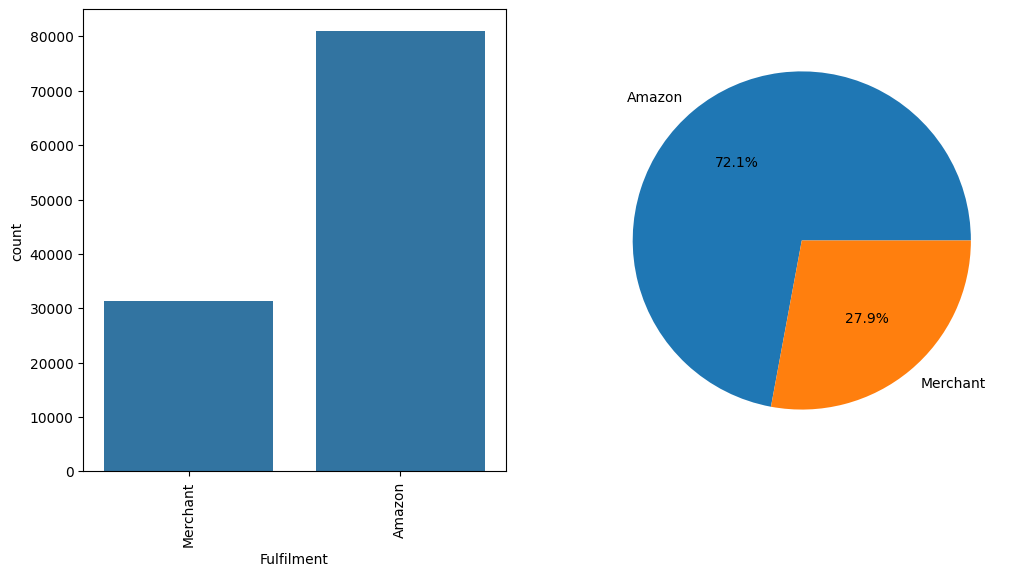

In [33]:
dt.cate(df,'Fulfilment')

## ship-service-level
conclusion
- mostly amazon is using Expedited ship seveice.expedited shiping service is very ship service and is using now
- only around 28% order amazon delvered by standerd ship 

ship-service-level
Expedited    79984
Standard     32250
Name: count, dtype: int64


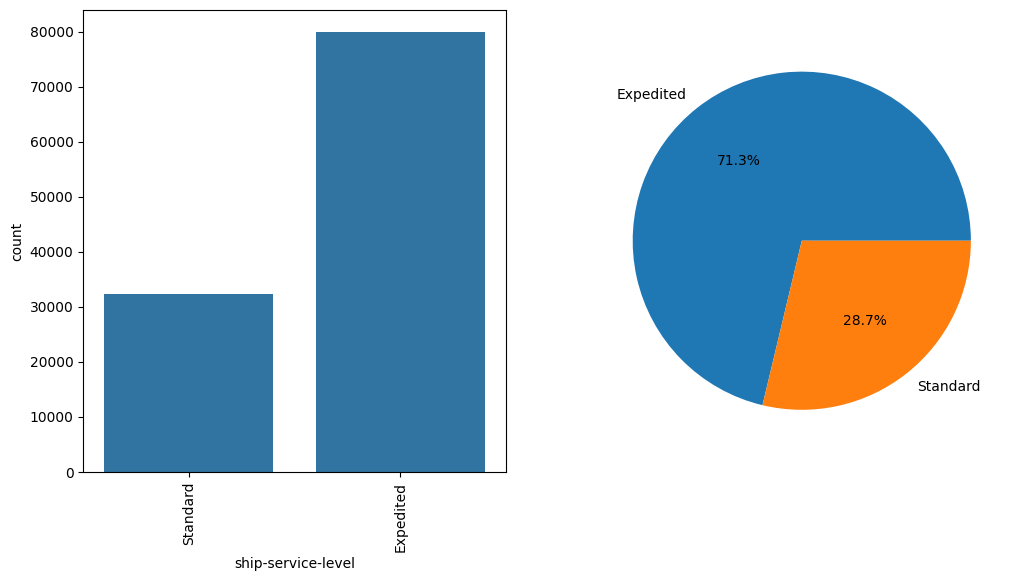

In [34]:
dt.cate(df,'ship-service-level')

## Category
conclusion
- Mostly peoples are purchase Kurta and Sets from amazon.both products are order sales percenter around(80%) take form overall sales
- western dress and top take 20% part of total sales
- other product take left sales part 

Category
kurta            44569
Set              41593
Western Dress    13841
Top               9834
Ethnic Dress      1028
Blouse             832
Bottom             389
Saree              145
Dupatta              3
Name: count, dtype: int64


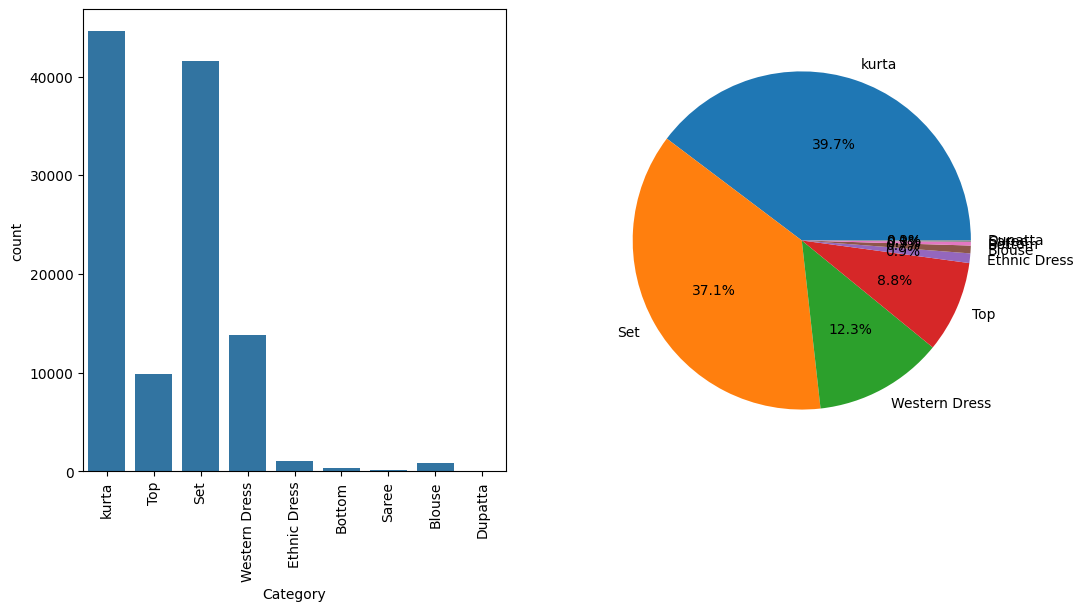

In [35]:
dt.cate(df,'Category')

## size
conclusion
- M ,
,,XL,8
, 6, 391, 30,.its size take same(approx) order percentage (98.2%) order market 
- left size take overall order market(approx 2%)
- And M,L is highly sold size.both are take [17.5,17.2] % market  9509

Size
M       19637
L       19313
XL      18258
XXL     15967
S       14691
3XL     13060
XS       9509
6XL       633
5XL       475
4XL       361
Free      330
Name: count, dtype: int64


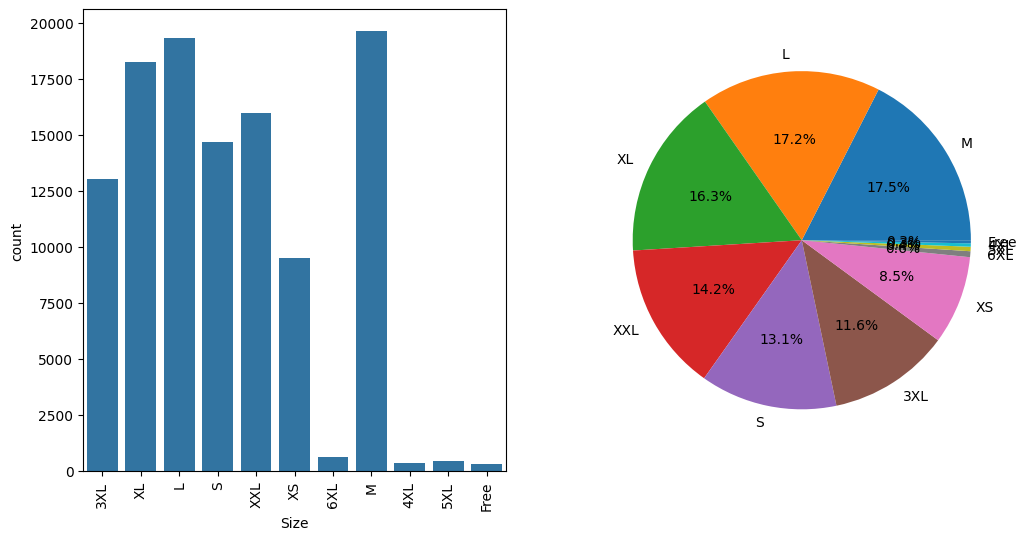

In [36]:
dt.cate(df,'Size')

## Courier Status 
conclusion
- more than 90% orders are shipped after the orders 


Courier Status
Shipped      105914
Unshipped      6320
Name: count, dtype: int64


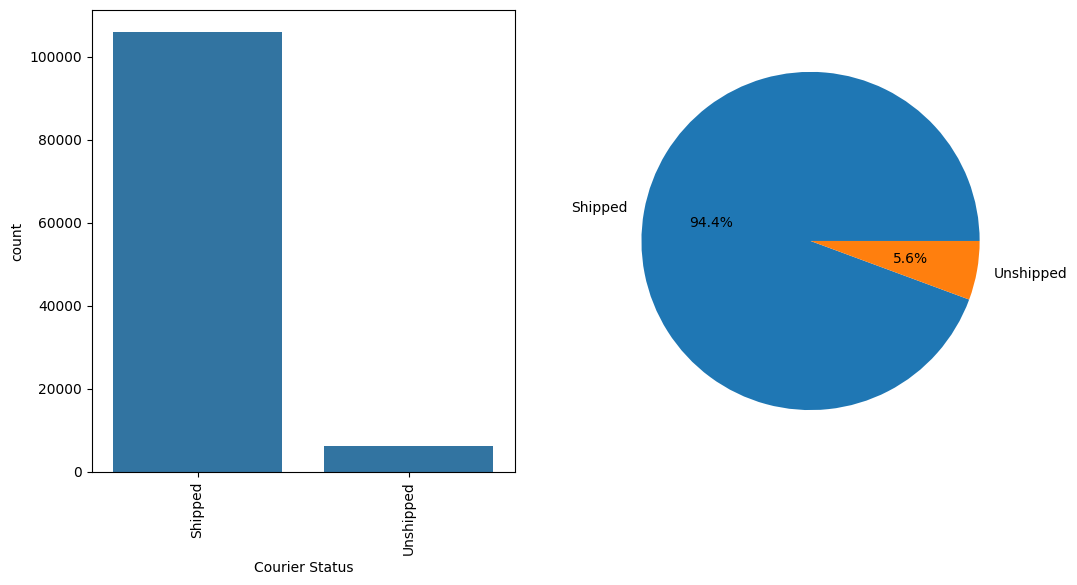

In [37]:
dt.cate(df,'Courier Status')

## ship State
conclusion
- These top 10 city on comes from order order. maharashtra is one of the state peoples purchase product on amazon
- Karnakatka is highest product purchase state on amazon

,ship-state,count
0,MAHARASHTRA,19698
1,KARNATAKA,15375
2,TAMIL NADU,10086
3,TELANGANA,9888
4,UTTAR PRADESH,9091
5,DELHI,5940
6,KERALA,5651
7,WEST BENGAL,5151
8,ANDHRA PRADESH,4643
9,HARYANA,3868


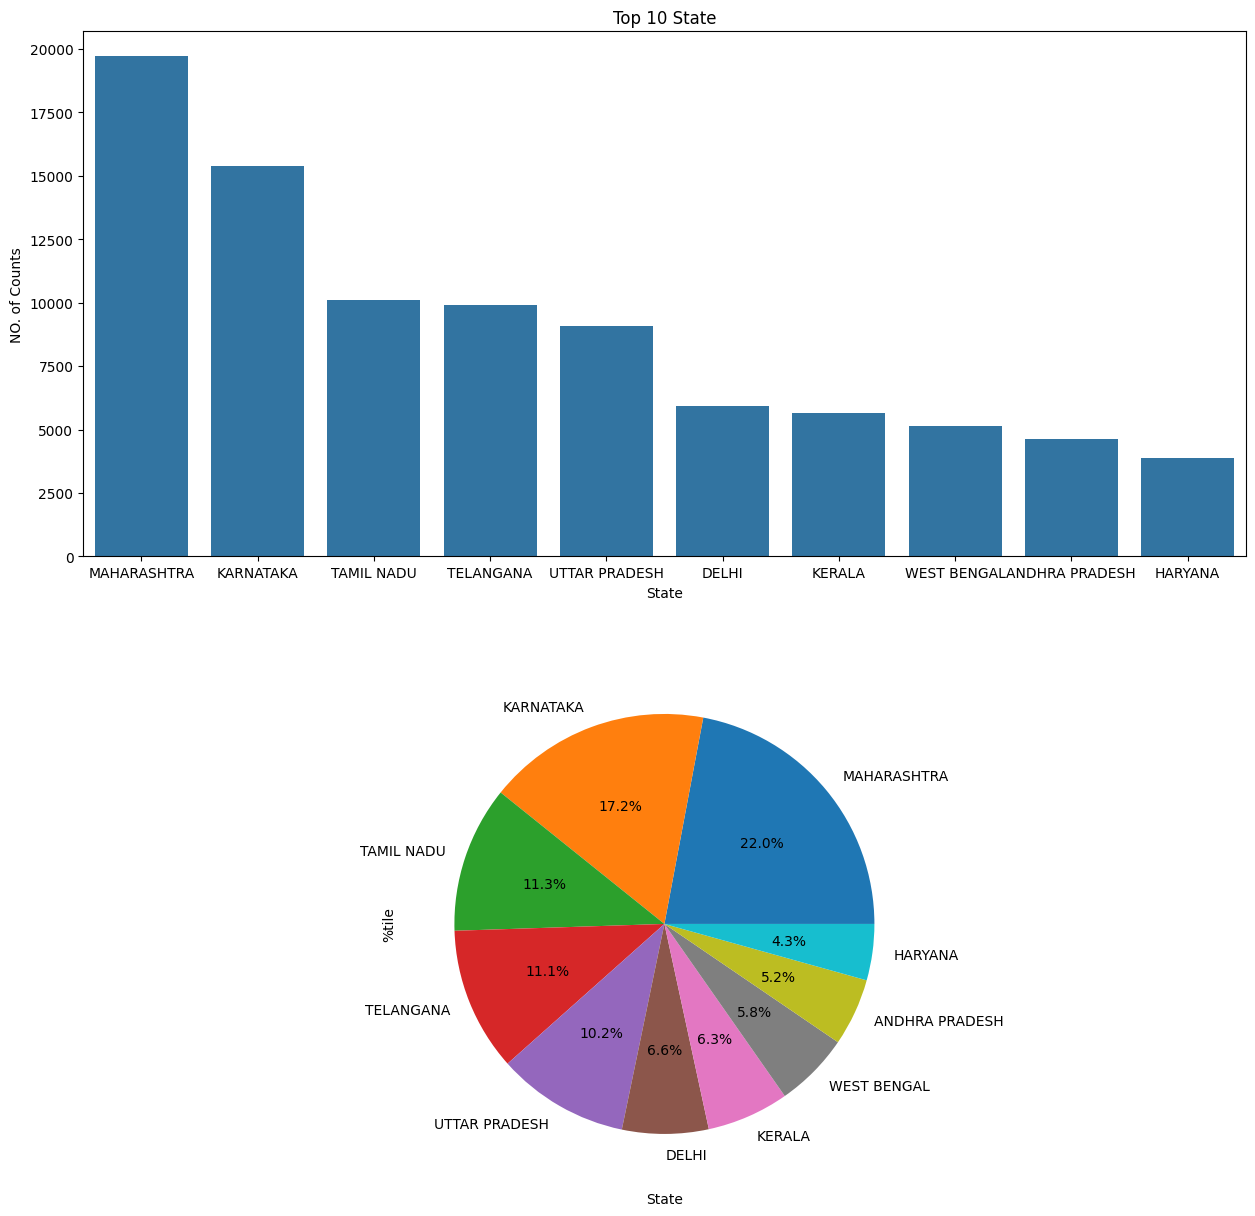

In [38]:
d = df['ship-state'].value_counts().reset_index().head(10)
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.barplot(x = d['ship-state'],y = d['count'])
plt.title('Top 10 State')
plt.xlabel('State')
plt.ylabel('NO. of Counts')
plt.subplot(2,1,2)
l = list(d['ship-state'])
plt.pie(d['count'],autopct = '%0.1f%%',labels = l)
plt.xlabel('State')
plt.ylabel('%tile')
d

## ship city
conclusion
- this a is top 10 cities. there highest order comes from these
- BENGALURU is one of the city.they are coming from around 20% order alone of one city
- Over all KARNATAKA state. 65% order comes from  BENGALURU city
- mumbai + thane + navi mumbai + mumbai = > 8000 order alone in one city (mumbai). so that the reason city is second highest cities on shopping from amazon 

,ship-city,count
0,BENGALURU,10078
1,HYDERABAD,7073
2,MUMBAI,5483
3,NEW DELHI,5063
4,CHENNAI,4808
5,PUNE,3422
6,KOLKATA,2093
7,GURUGRAM,1664
8,THANE,1489
9,NOIDA,1227


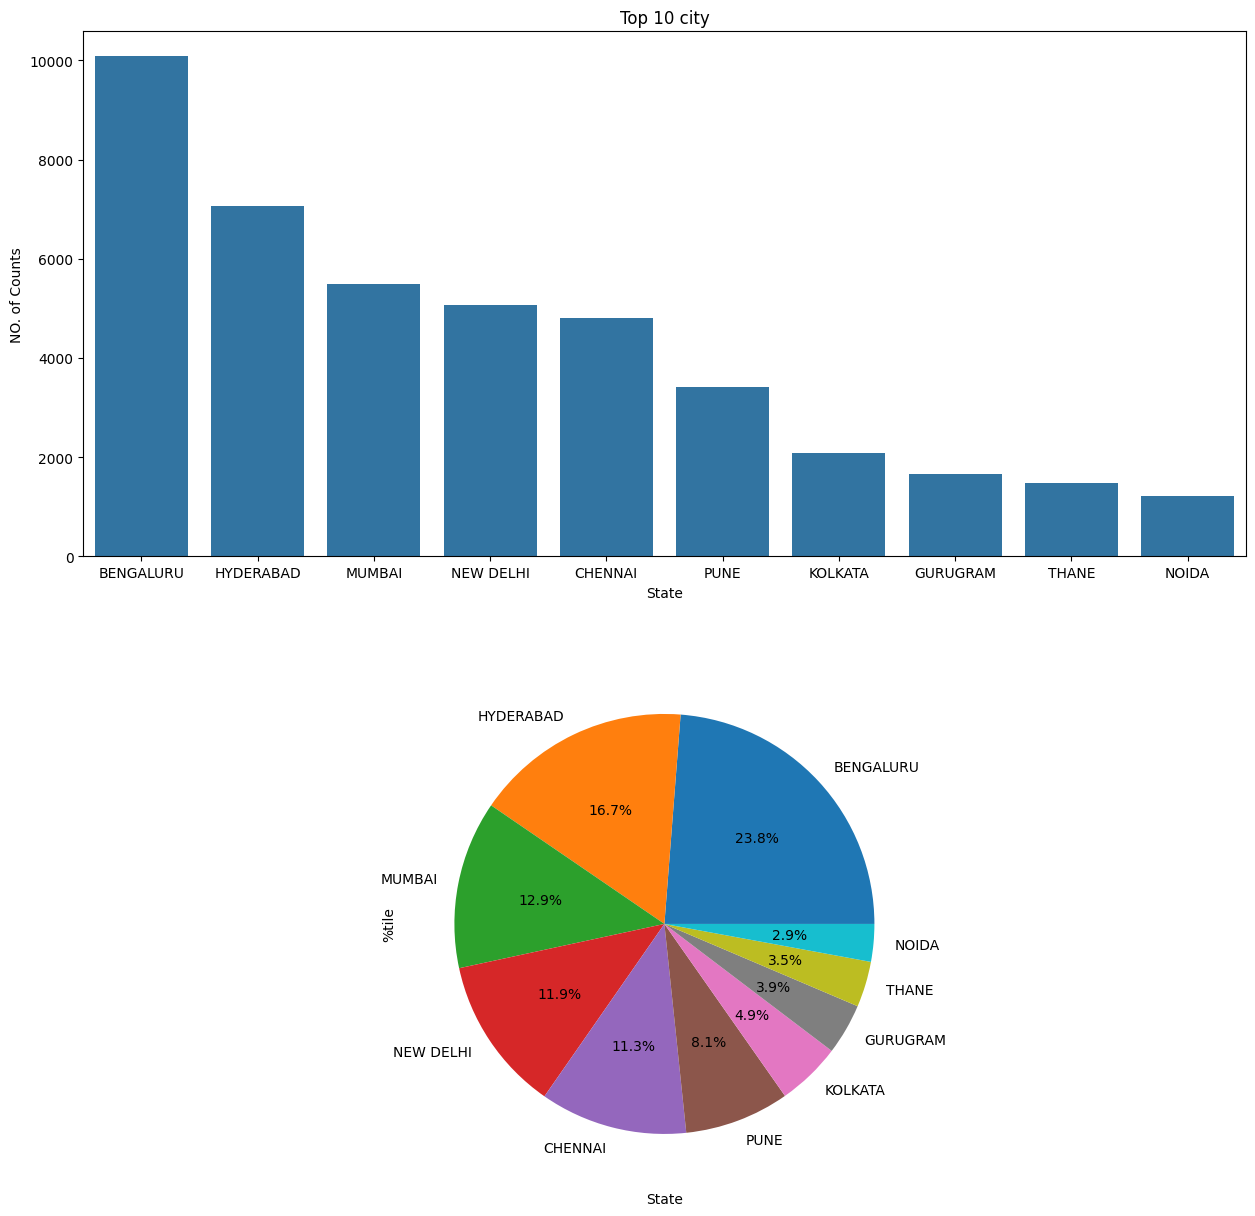

In [39]:
d = df['ship-city'].value_counts().reset_index().head(10)
plt.figure(figsize = (15,15))
plt.subplot(2,1,1)
sns.barplot(x = d['ship-city'],y = d['count'])
plt.title('Top 10 city')
plt.xlabel('State')
plt.ylabel('NO. of Counts')
plt.subplot(2,1,2)
l = list(d['ship-city'])
plt.pie(d['count'],autopct = '%0.1f%%',labels = l)
plt.xlabel('State')
plt.ylabel('%tile')
d

In [40]:
df[df['ship-city'] == 'BENGALURU'].shape[0]/df[df['ship-state'] == 'KARNATAKA'].shape[0]*100

65.5479674796748

In [41]:
df[df['ship-state'] == 'MAHARASHTRA']['ship-city'].value_counts().head(10)

ship-city
MUMBAI              5483
PUNE                3422
THANE               1489
NAVI MUMBAI         1104
Mumbai               793
PIMPRI CHINCHWAD     647
Pune                 594
NAGPUR               540
KALYAN               451
NASHIK               285
Name: count, dtype: int64

## fulfilled-by
conclusion
- There are small changes in this data (m for missing)
- Amazon is fullfilled order on around (27%)approx through Easy-ship
- left order are fullfilled by self (i am not absoult i only think not sure)

fulfilled-by
m            80899
Easy Ship    31335
Name: count, dtype: int64


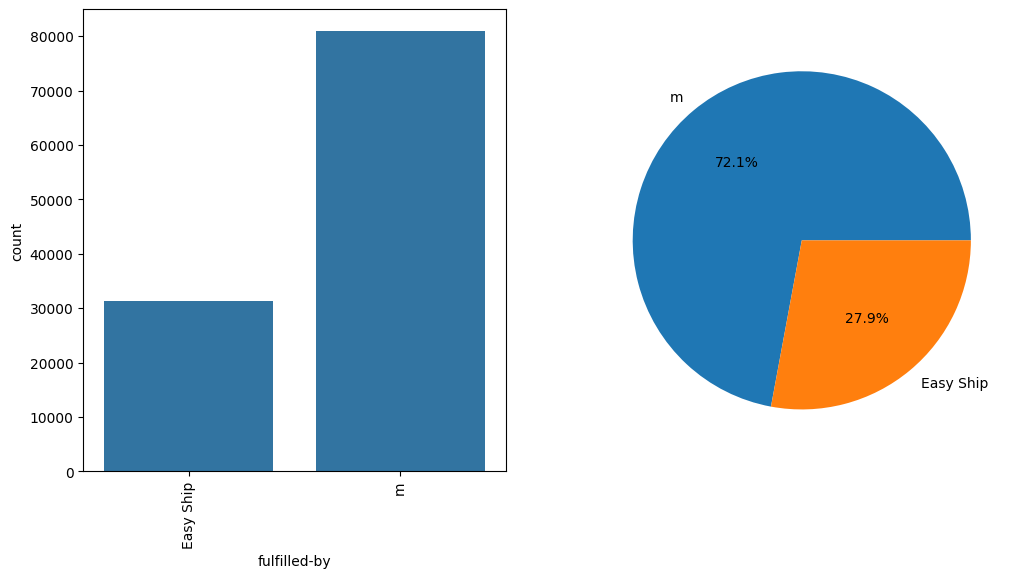

In [42]:
dt.cate(df,'fulfilled-by')

## B2B (Bussiness to Bussiness)
conclusion
- Amazon is almost do B2C Bussiness.they are only 0.7% order are B2B order
- all order are fillfull B2C (bussiness to consumer)
   

B2B
False    111450
True        784
Name: count, dtype: int64


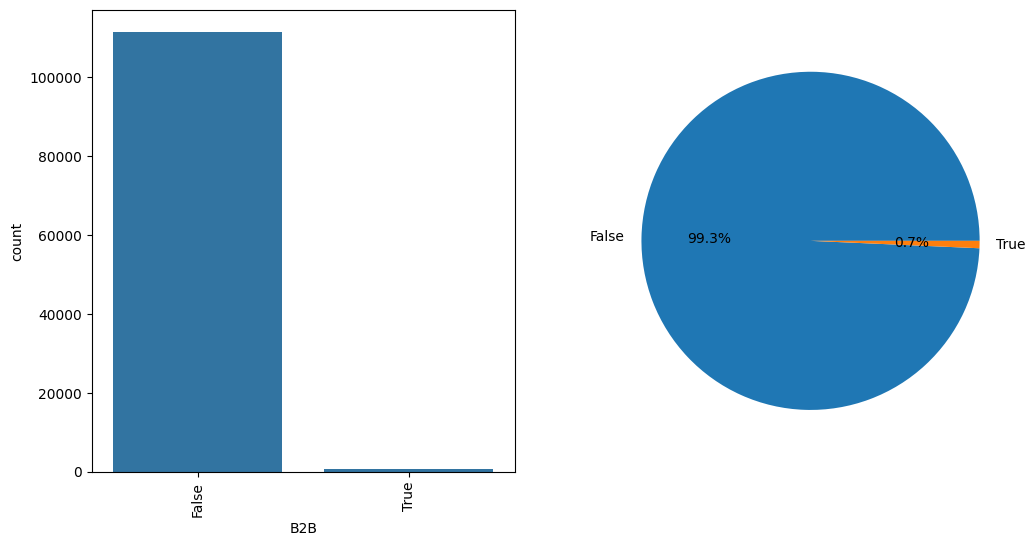

In [43]:
dt.cate(df,'B2B')

## Status
conclusion
- there are mainly order on shipped
- shipped - delivered to seller 

Status
Shipped                          75079
Shipped - Delivered to Buyer     27830
Cancelled                         5427
Shipped - Returned to Seller      1876
Shipped - Picked Up                935
Pending                            629
Pending - Waiting for Pick Up      274
Shipped - Returning to Seller      136
Shipped - Out for Delivery          31
Shipped - Rejected by Buyer         11
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: count, dtype: int64


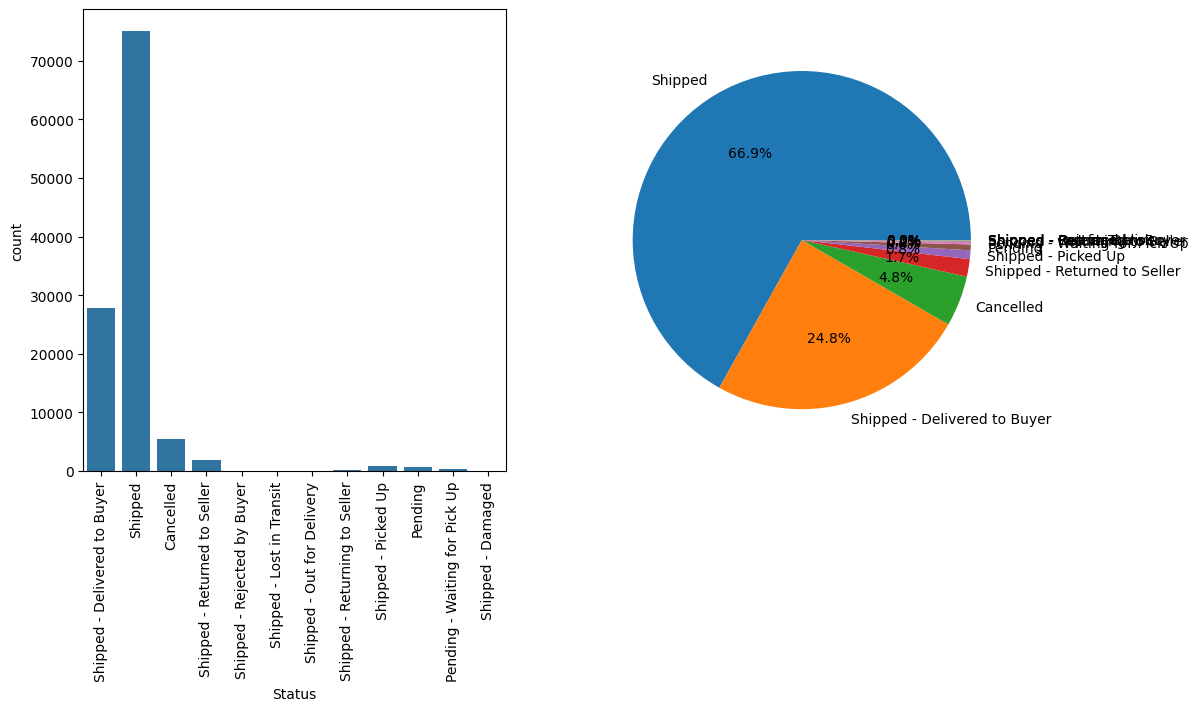

In [44]:
dt.cate(df,'Status')

In [45]:
## i have drop two columns like ship -country and promatiom-ids,sku 


In [46]:
df.drop(columns = ['SKU','ship-country','promotion-ids'],axis = 1,inplace = True)

## Status to Fulfilment
conclusion
- Those sales are fullfill by amazon is there 6%  orders are cancalled
- 0.4% order are cancalled and 92% orders are shipped And NO other factor
- mainly amazon are fullfill the order is three stepp.that is amazon is fast delivery as compare to merchant 
- Those order are fullfill by the merchant are going to many process of many state
- Second factor is that those order are full fill they 100% shipped by 'Standard shiping service'
- Amazon is using on both shipping services.

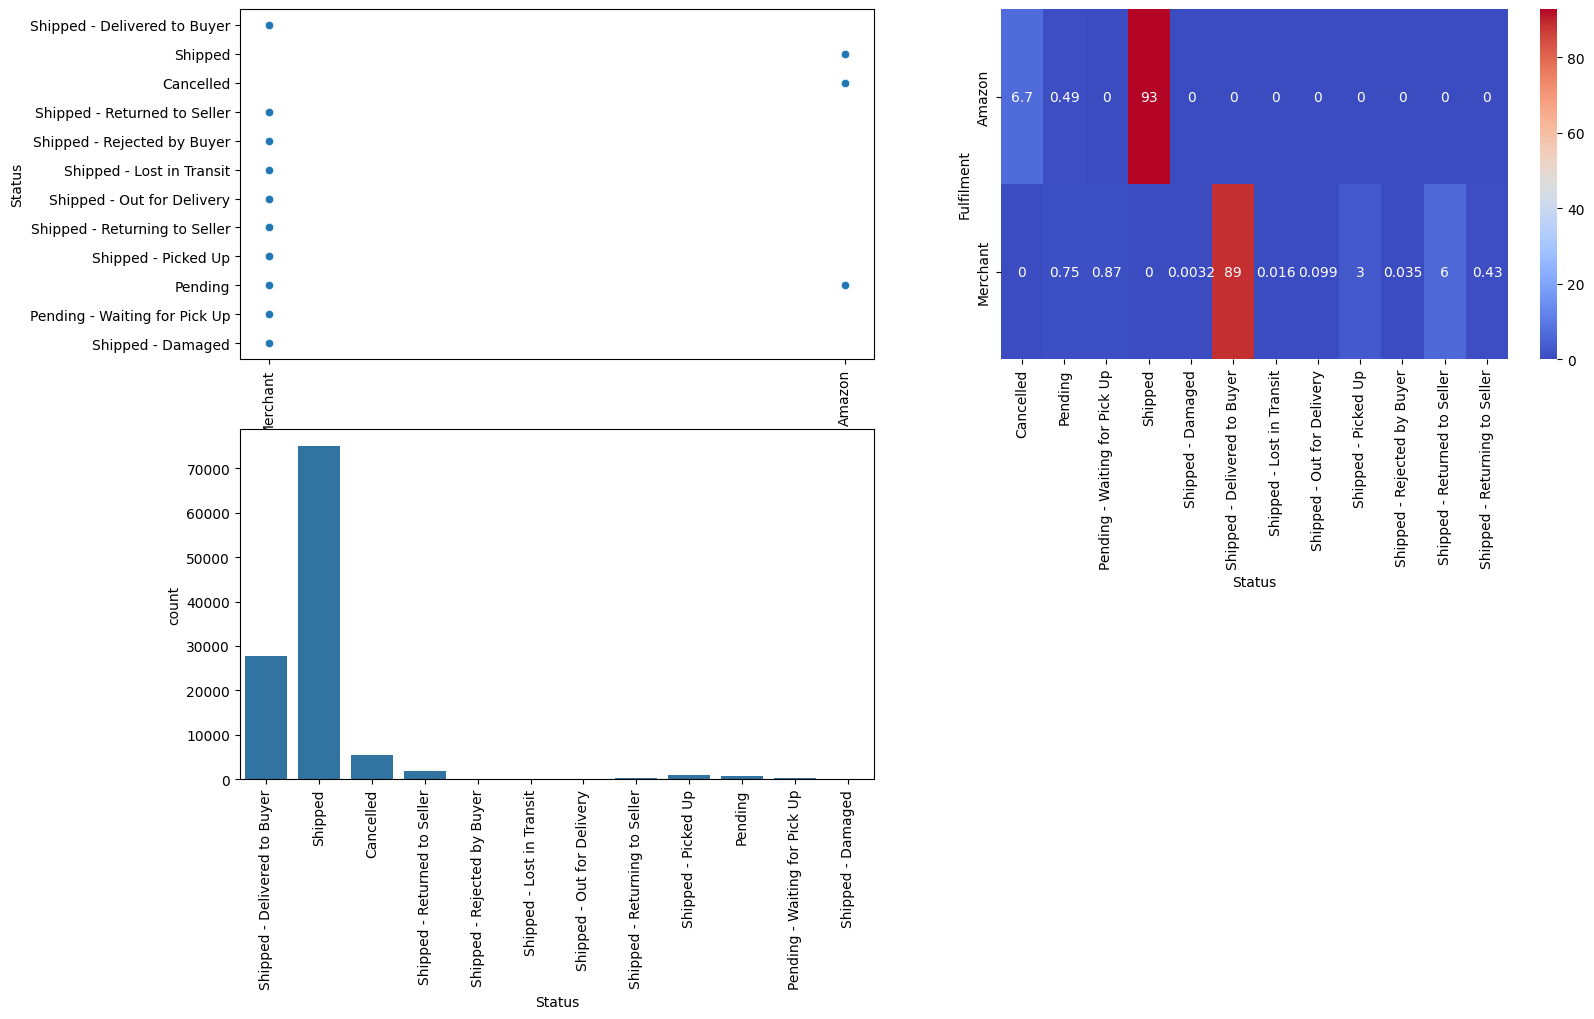

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
Fulfilment,,,,,,,,,,,,
Amazon,6.708365,0.485791,0.000000,92.805844,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Merchant,0.000000,0.753151,0.874422,0.000000,0.003191,88.814425,0.015957,0.098931,2.983884,0.035105,5.986916,0.434019


In [47]:
dt.bia(df,'Fulfilment','Status','index')

In [48]:
df[df['Fulfilment'] == 'Merchant']['ship-service-level'].value_counts()
df[df['Fulfilment'] == 'Amazon']['ship-service-level'].value_counts()

ship-service-level
Expedited    79984
Standard       915
Name: count, dtype: int64

## status to ship-service-level 
conclusion
- mostly amazon is using Expedited usign serive.so it main reason 6.7%  order are cancelled on expedited shipping
- 98% orders are shipped And no Going other state
- Around 6% order are cancelled.But 0.4 Are are pending.that mean expedited shipping is fast 
- Those orders Are cancelled They order are fullfill by amazon not for merchant

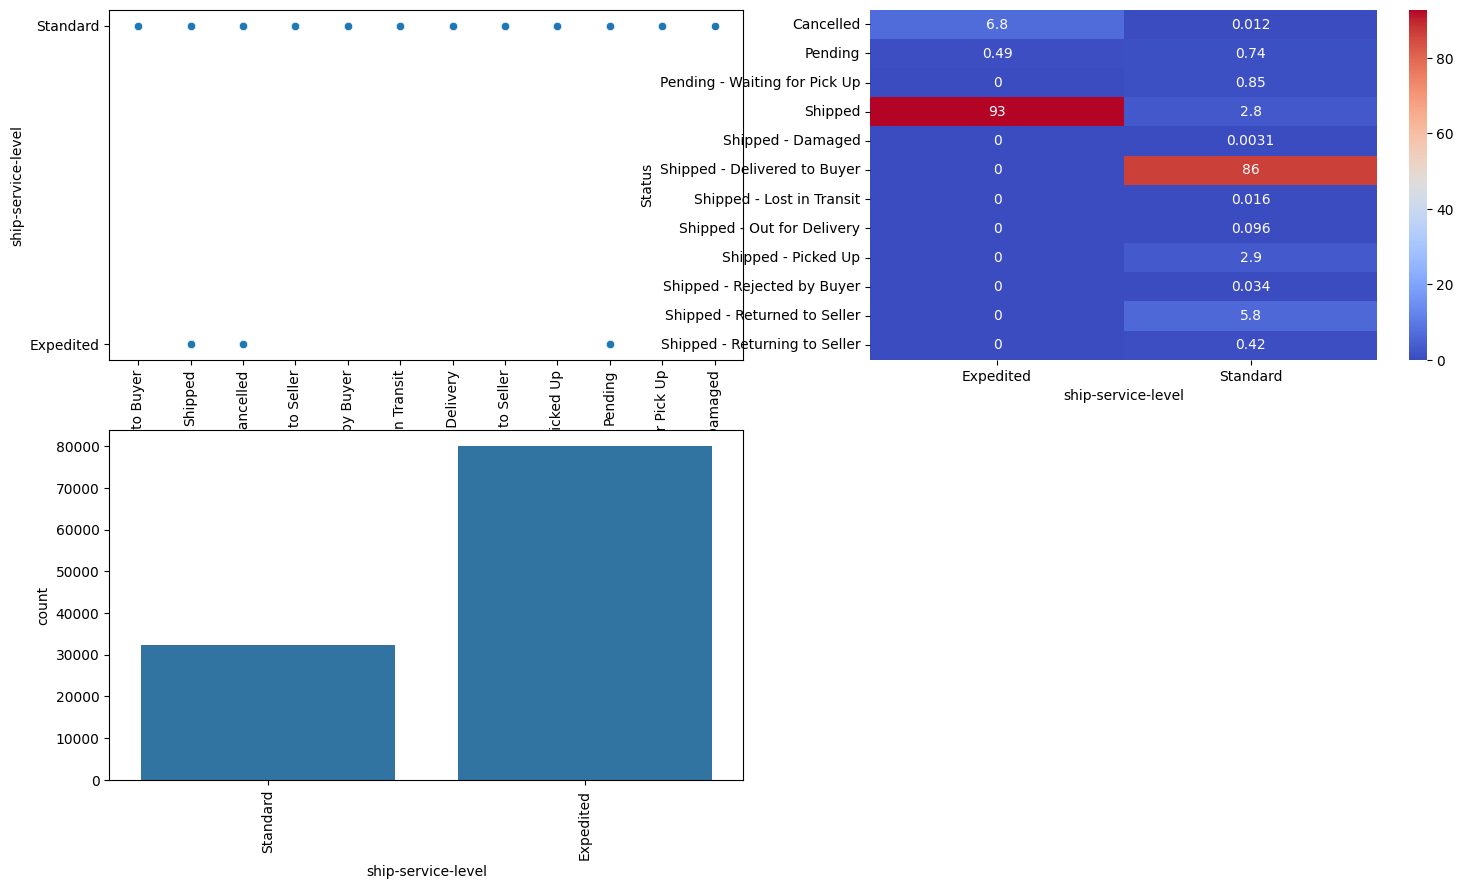

ship-service-level,Expedited,Standard
Status,,
Cancelled,6.780106,0.012403
Pending,0.488848,0.737984
Pending - Waiting for Pick Up,0.000000,0.849612
Shipped,92.731046,2.818605
Shipped - Damaged,0.000000,0.003101
Shipped - Delivered to Buyer,0.000000,86.294574
Shipped - Lost in Transit,0.000000,0.015504
Shipped - Out for Delivery,0.000000,0.096124
Shipped - Picked Up,0.000000,2.899225


In [49]:
dt.bia(df,'Status','ship-service-level','columns')

In [50]:
df[(df['Status'] == 'Cancelled')]['ship-service-level'].value_counts()
# df[df['Fulfilment'] == 'Amazon']['ship-service-level'].value_counts()
# (df['ship-service-level'] == 'Standard') & 

ship-service-level
Expedited    5423
Standard        4
Name: count, dtype: int64

## Fulfilment to Fulfilment 
conclusion 
- Amazon is using on both shipping service
-  Merchant is using on Standard shipping service
- 98% order are delivered or expedited shippin service.only 1.5% (approx) orders are delivered by standard shipping service
- very possiblity to order cancellation on strandard Expedited service

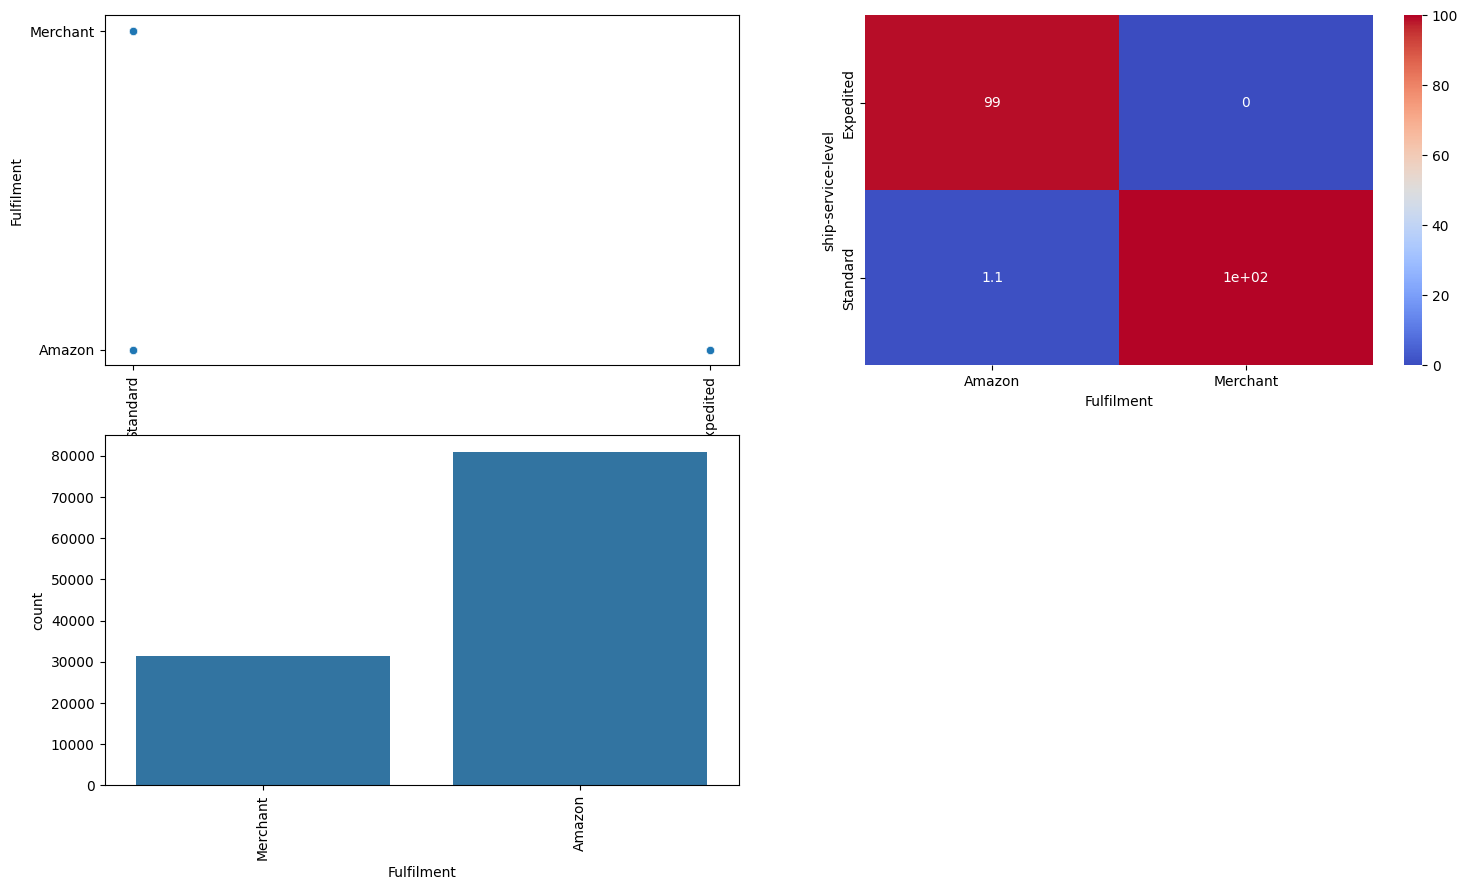

Fulfilment,Amazon,Merchant
ship-service-level,,
Expedited,98.86896,0.0
Standard,1.13104,100.0


In [51]:
dt.bia(df,'ship-service-level','Fulfilment','columns')

## Category to Fulfilment
conclusion
- Almost Merchants are sell every category but its not sales on duppta
- other hand amazon is selling all of this

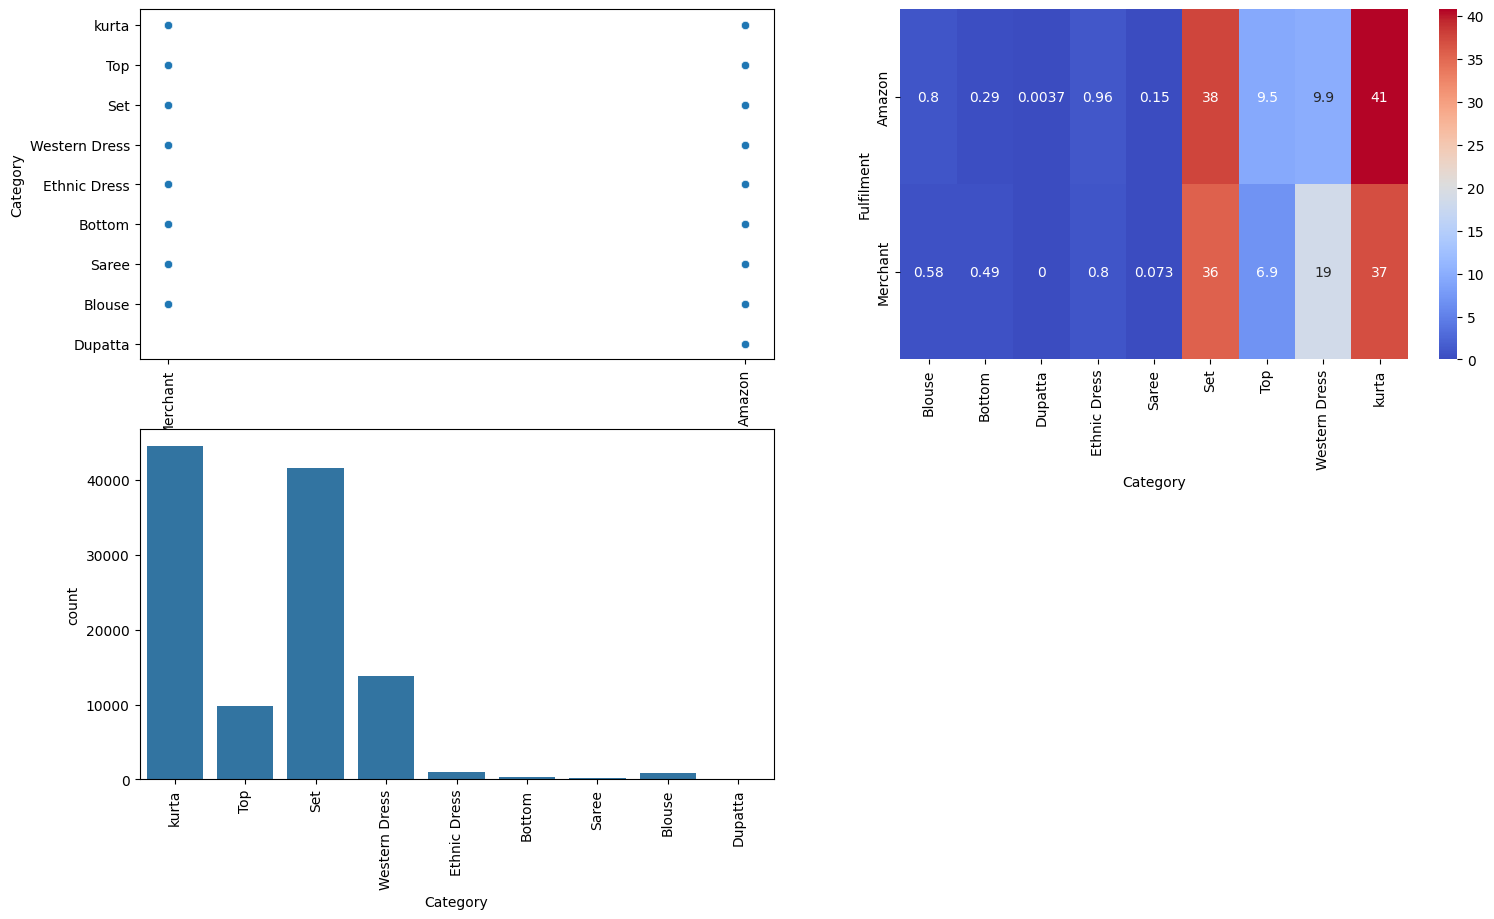

Category,Blouse,Bottom,Dupatta,Ethnic Dress,Saree,Set,Top,Western Dress,kurta
Fulfilment,,,,,,,,,
Amazon,0.803471,0.290486,0.003708,0.960457,0.150805,37.643234,9.493319,9.904943,40.749577
Merchant,0.580820,0.491463,0.000000,0.801021,0.073400,35.551300,6.874102,18.599011,37.028881


In [52]:
dt.bia(df,'Fulfilment','Category','index')

## Fulfilment to b2b
conclusion
- both fulfilment almost not working on B2B business.they Working on B2C 

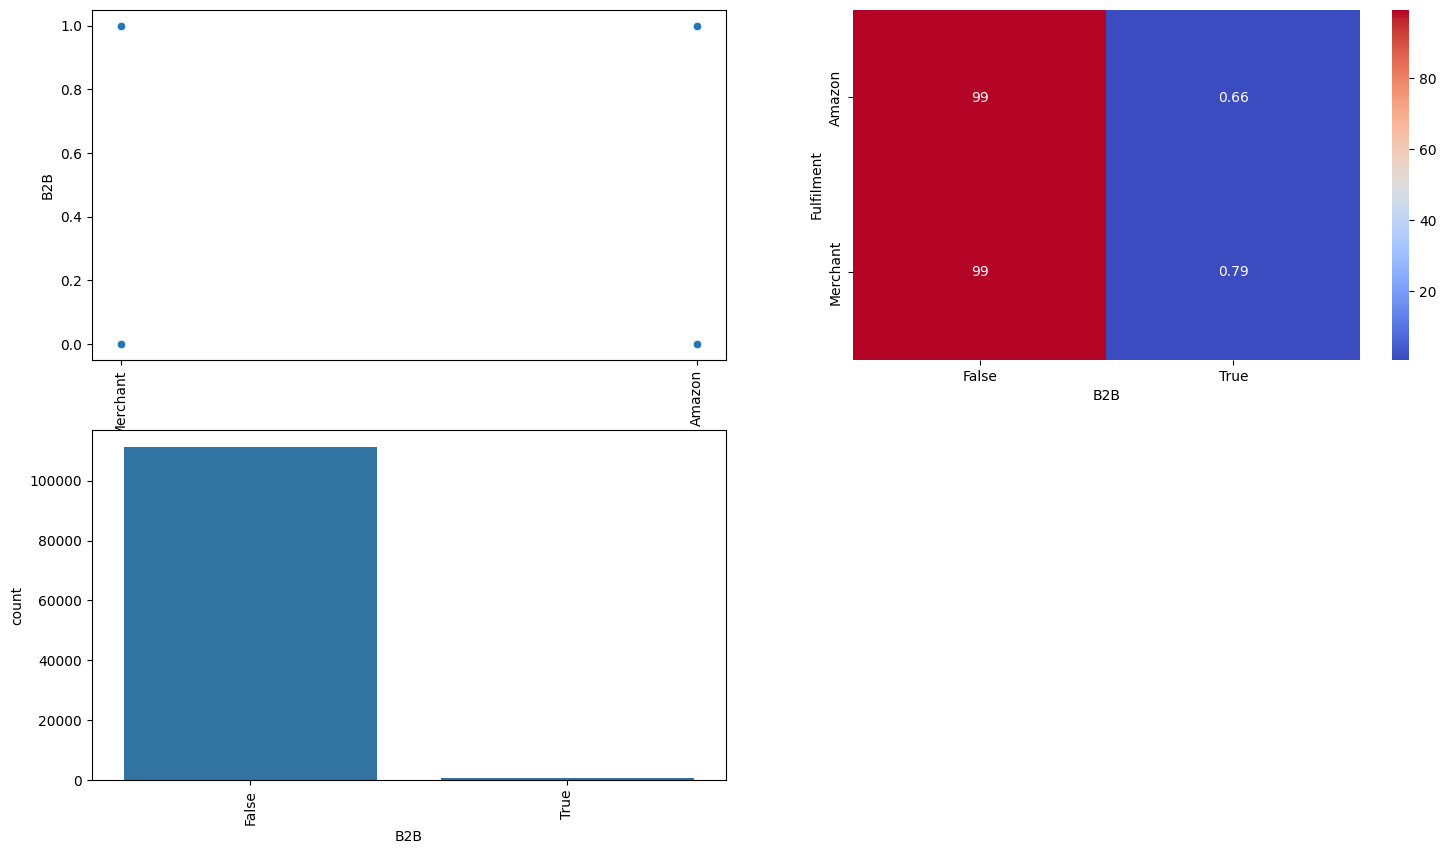

B2B,False,True
Fulfilment,,
Amazon,99.338682,0.661318
Merchant,99.205361,0.794639


In [53]:
dt.bia(df,'Fulfilment','B2B','index')

## fulfilled-by to fulfilment
conclusion
- Merchants are using on  Easyship shipping service company
- M not company (m - Missing).

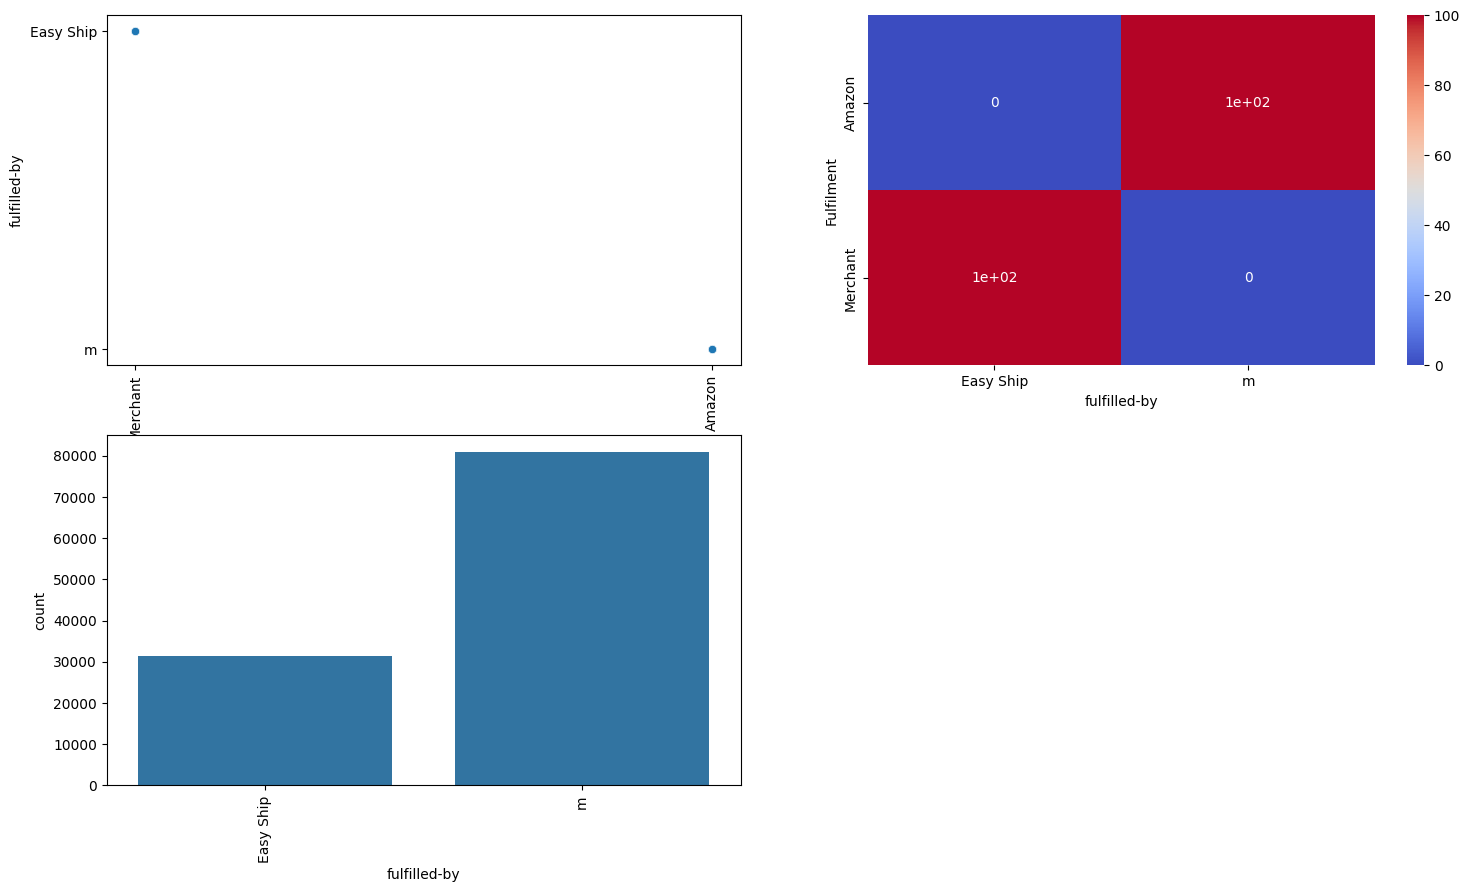

fulfilled-by,Easy Ship,m
Fulfilment,,
Amazon,0.0,100.0
Merchant,100.0,0.0


In [54]:
dt.bia(df,'Fulfilment','fulfilled-by','index')

In [55]:
df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'Category', 'Size', 'Courier Status', 'Qty', 'Amount',
       'ship-city', 'ship-state', 'B2B', 'fulfilled-by'],
      dtype='object')

## Status to Courier Status
conclusion
- only those order status on cancalled while orders are unshipped.that mean order is cancalled before shipped
- And shipped order are one on other states 

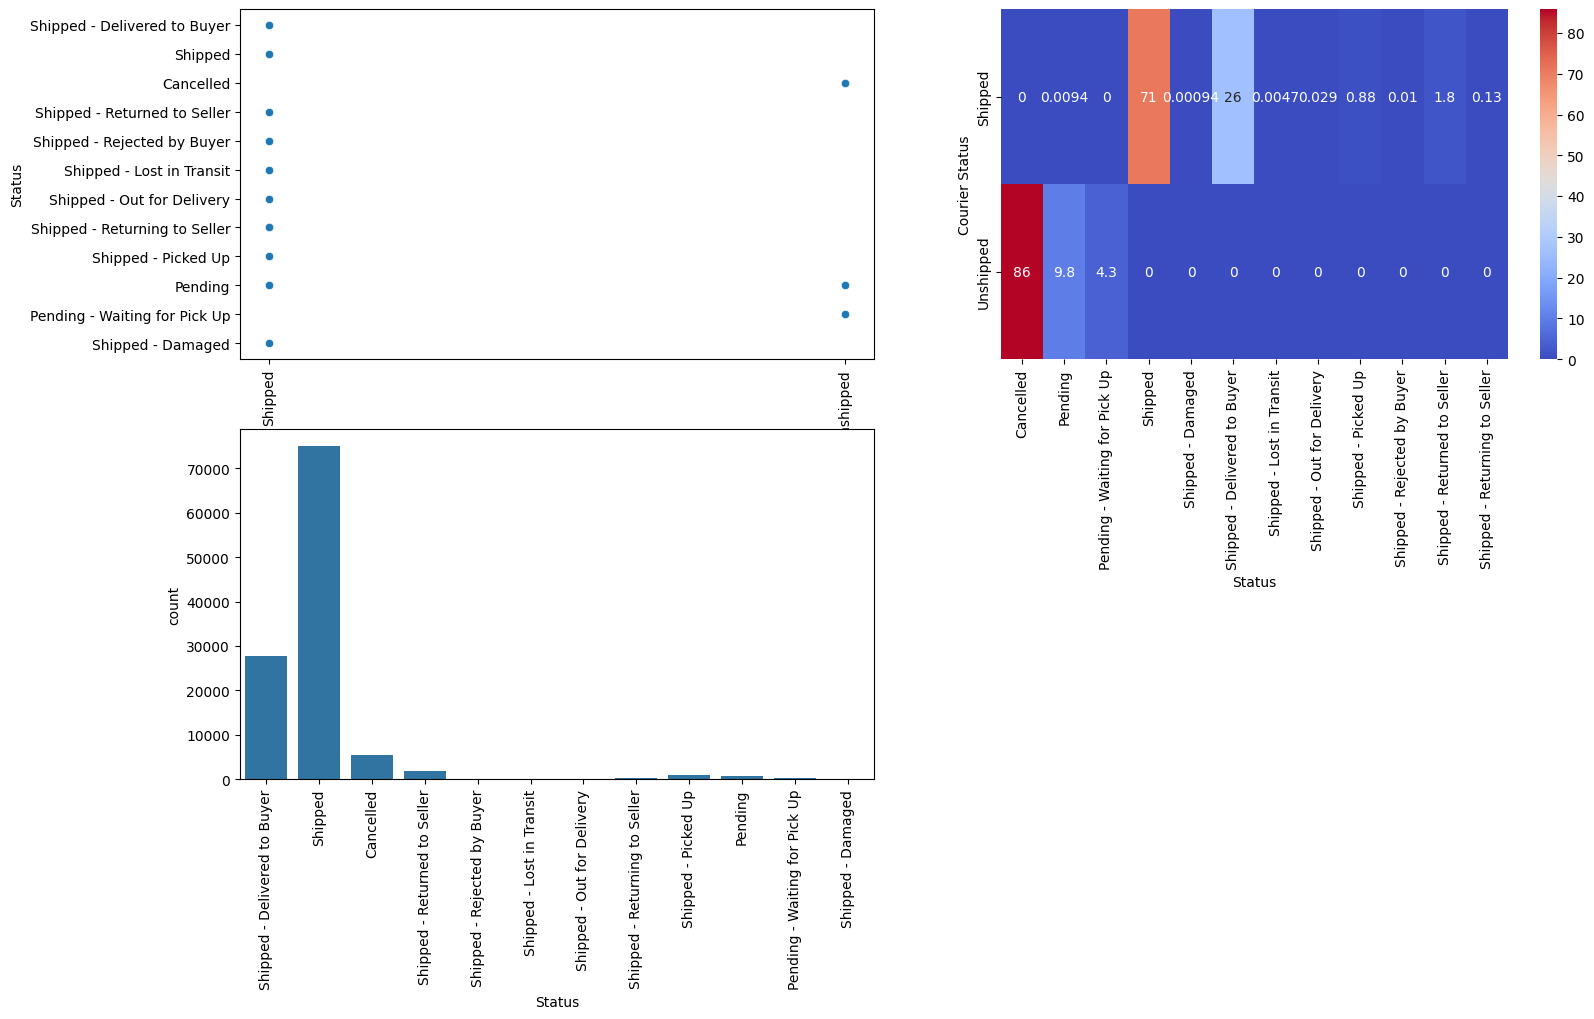

Status,Cancelled,Pending,Pending - Waiting for Pick Up,Shipped,Shipped - Damaged,Shipped - Delivered to Buyer,Shipped - Lost in Transit,Shipped - Out for Delivery,Shipped - Picked Up,Shipped - Rejected by Buyer,Shipped - Returned to Seller,Shipped - Returning to Seller
Courier Status,,,,,,,,,,,,
Shipped,0.000000,0.009442,0.000000,70.886757,0.000944,26.276035,0.004721,0.029269,0.882792,0.010386,1.771248,0.128406
Unshipped,85.870253,9.794304,4.335443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
dt.bia(df,'Courier Status','Status','index')

In [57]:
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,m
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,m
5,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,m
6,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,m


In [58]:
def date(data):
    f = data.split('-')
    return f[1]
df['Date_month'] = df['Date'].apply(date)

In [59]:
def month(data):
    f = data.split('-')
    return f[0]
df['month'] = df['Date'].apply(month)

## date_month
conlcusion
- mainly custmoers are order on starting on month than its decrease the number of order when increase the date

<Axes: xlabel='Date_month'>

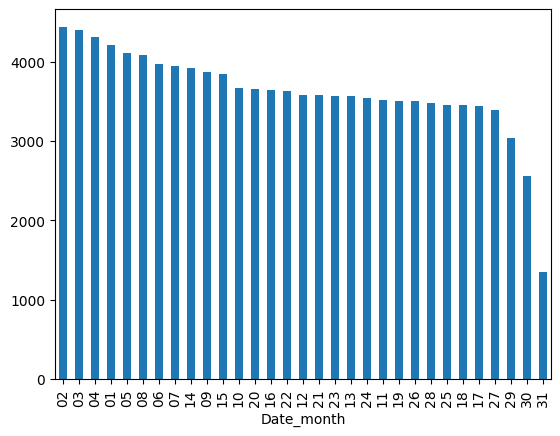

In [60]:
df['Date_month'].value_counts().plot(kind = 'bar')

## month columns 
conclusion
- Mostly peoples are order on 4,5,6 month like April,May,June
- more the 38% peoples are order on april month


<Axes: xlabel='month'>

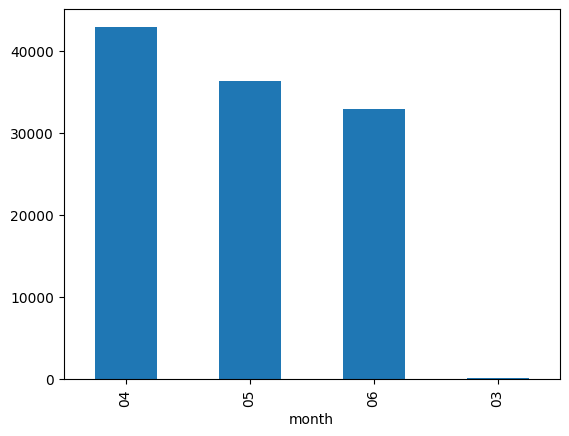

In [61]:
df['month'].value_counts().plot(kind = 'bar')

In [62]:
df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,Category,Size,Courier Status,Qty,Amount,ship-city,ship-state,B2B,fulfilled-by,Date_month,month
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,kurta,3XL,Shipped,1,406.0,BENGALURU,KARNATAKA,False,Easy Ship,30,04
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,kurta,XL,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,True,m,30,04
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,Top,3XL,Shipped,1,574.0,CHENNAI,TAMIL NADU,False,m,30,04
5,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,Set,XL,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,False,m,30,04
6,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,Set,L,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,False,m,30,04


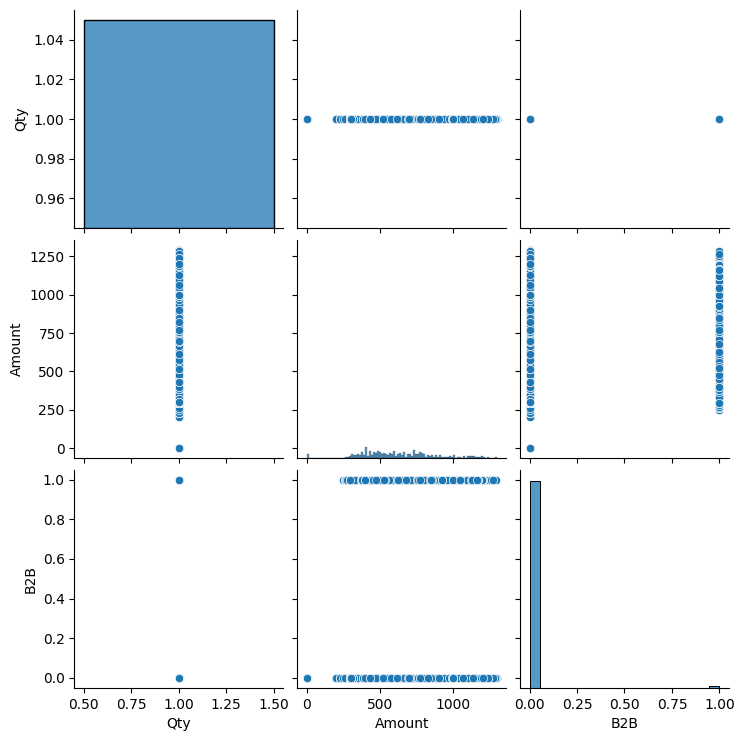

In [63]:
sns.pairplot(df)

## category to amount 
conlusion
- set and western dress,kurta these category are more sell on purchase set is across 30 lac revenue and kurta across 20 lac revenue over all sales amount  

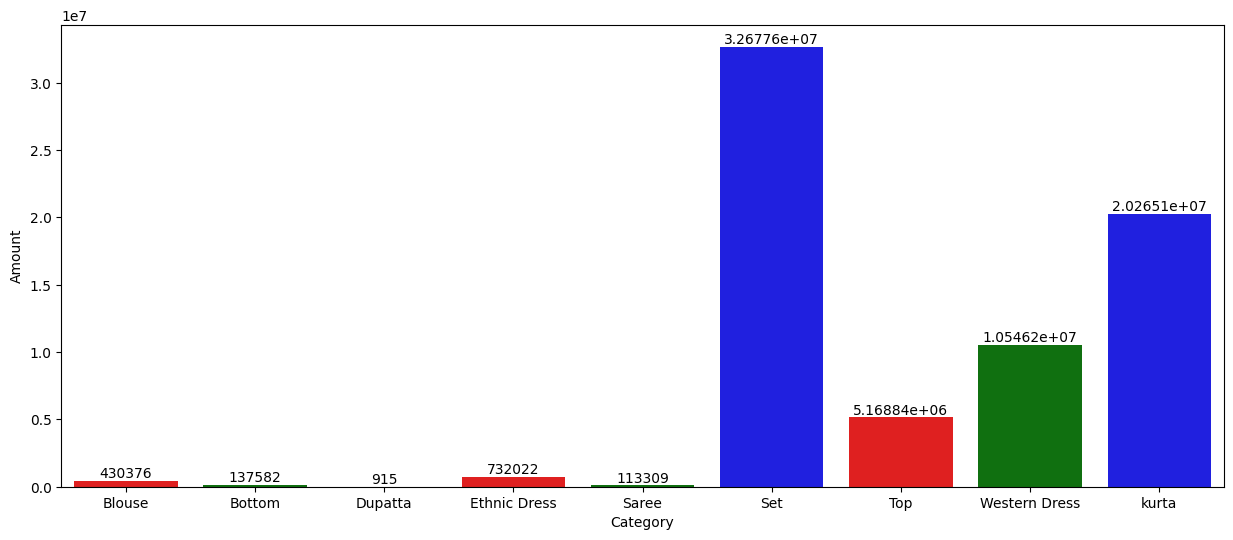

,Category,Amount
0,Blouse,430376.0
1,Bottom,137582.0
2,Dupatta,915.0
3,Ethnic Dress,732022.0
4,Saree,113309.0
5,Set,32677575.0
6,Top,5168838.0
7,Western Dress,10546192.0
8,kurta,20265116.0


In [64]:
d = df.groupby('Category')['Amount'].sum().reset_index()
plt.figure(figsize= (15,6))
ax = sns.barplot(data = d,x = 'Category',y= 'Amount',palette = list('rgb'))
for i in range(d['Amount'].nunique()):
    ax.bar_label(ax.containers[i])
plt.show()
d

##  category to qty
conclusion
- previously we are study on category and amount then set is higly revenue product.
- Kurta is second higly revenue generated product.
- But Kurta is mostly selling product as compare to sets its more 44000 qty sale of kurta
- i mean to say sets.some sets are very costly as compare to kurts 
- duptta is lowest selling prodcut is only 3 piece are sell


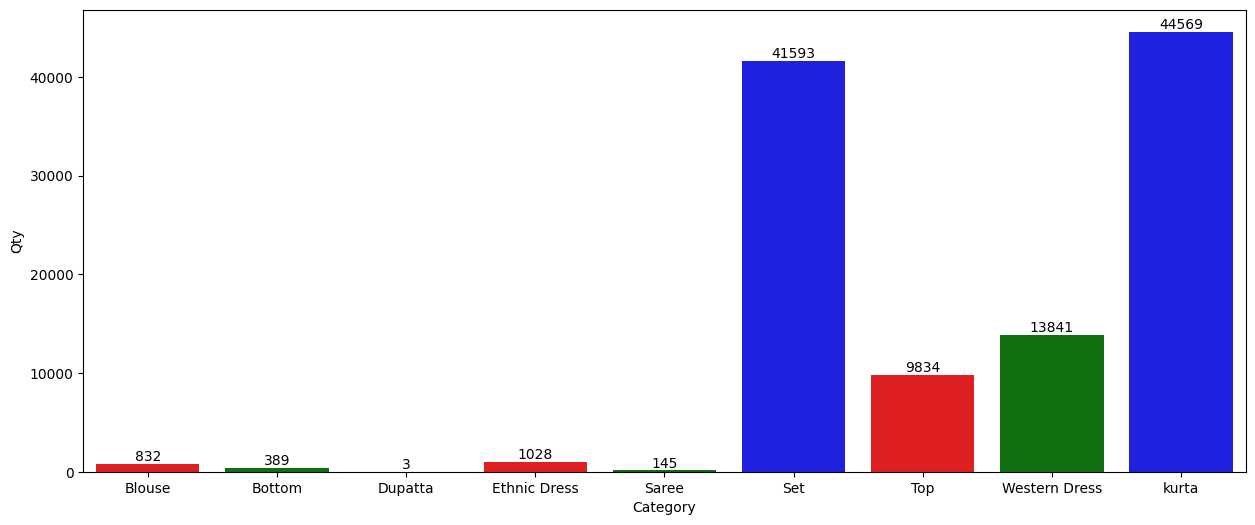

,Category,Qty
0,Blouse,832
1,Bottom,389
2,Dupatta,3
3,Ethnic Dress,1028
4,Saree,145
5,Set,41593
6,Top,9834
7,Western Dress,13841
8,kurta,44569


In [65]:
d = df.groupby('Category')['Qty'].sum().reset_index()
plt.figure(figsize= (15,6))
ax = sns.barplot(data = d,x = 'Category',y= 'Qty',palette = list('rgb'))
for i in range(d['Qty'].nunique()):
    ax.bar_label(ax.containers[i])
plt.show()
d